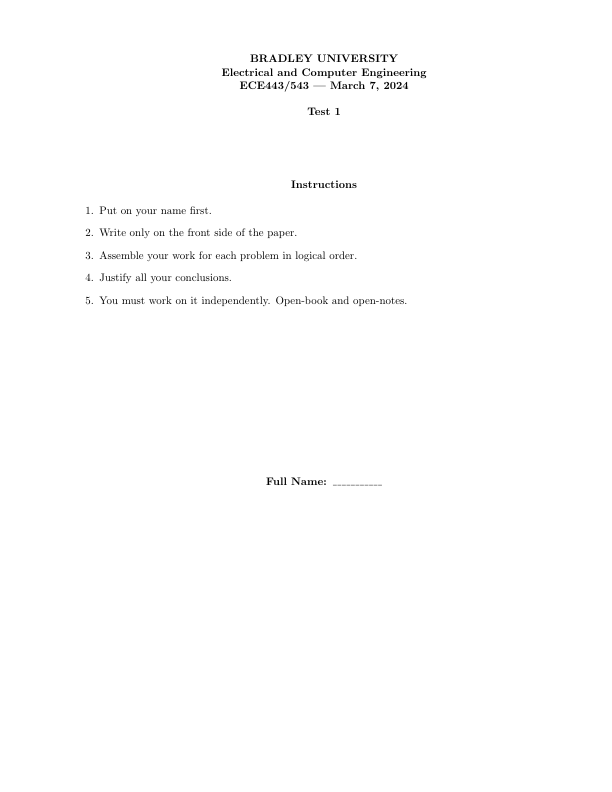

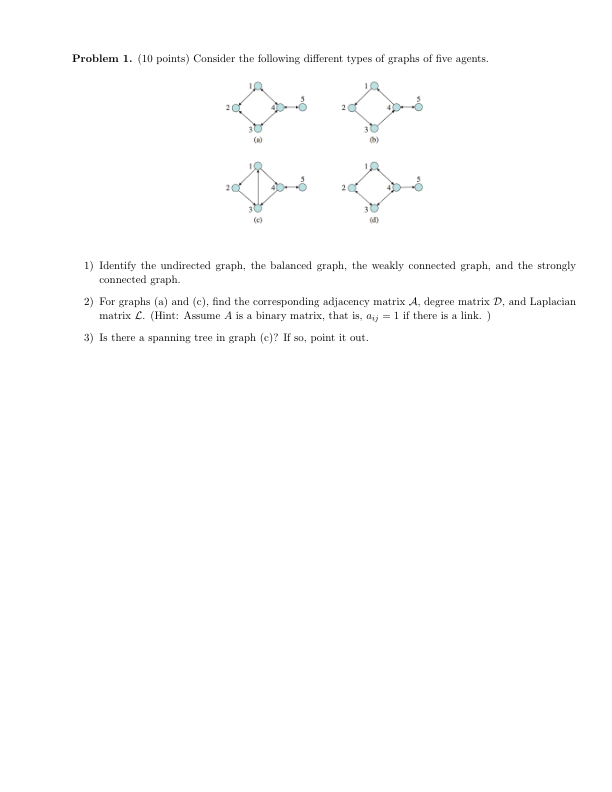

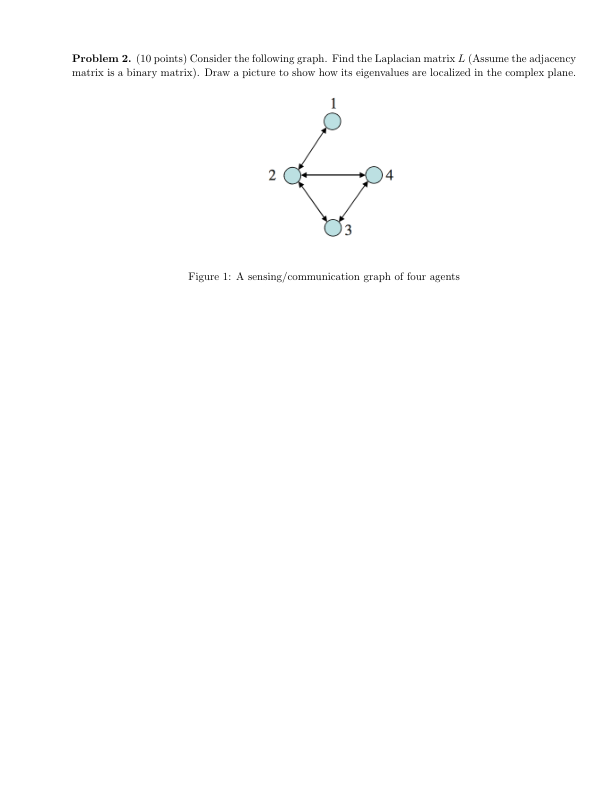

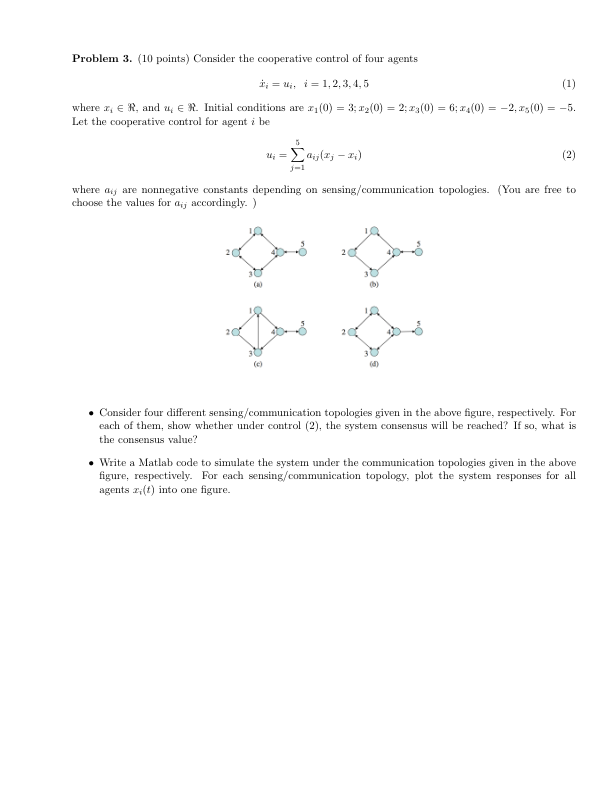

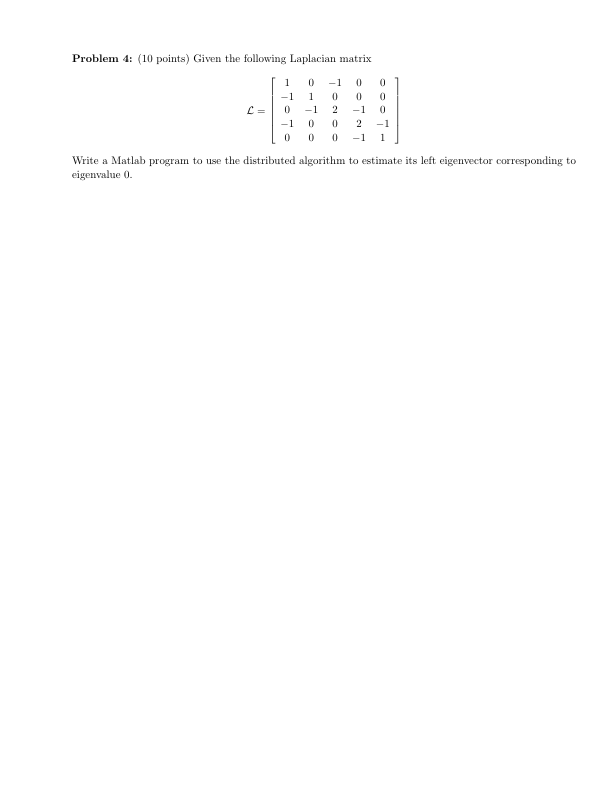

In [2]:
import fitz  # PyMuPDF
from IPython.display import display, Image

def display_pdf_images(pdf_path):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    
    # Display each page as an image
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        image_bytes = page.get_pixmap().tobytes()
        display(Image(data=image_bytes))

# Call the function with the path to your PDF file
display_pdf_images("test1.pdf")

In [40]:
#problem1
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a undirected graph
G = nx.DiGraph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)


edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1,4)]
bidirectional_edges = []

for edge in edges:
    bidirectional_edges.append(edge)
    bidirectional_edges.append((edge[1], edge[0]))  # Adding the reverse direction of the edge
# Add all edges
'''
edges2 = [(1, 2), (2, 3), (3, 4), (4, 5), (1,4)]
tional_edges = []

for edge in edge:

    G.add_edges_from(bidirectional_edges)
'''

edges2 = [(1, 2), (2, 3), (3, 1), (1, 4), (4,3), (4,5), (5,4)]
G.add_edges_from(edges2)
# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G)
adj_array = adj_matrix.toarray()


# Compute the degree matrix
degree_matrix = np.diag(np.sum(adj_array, axis=1))

# Compute the Laplacian matrix
laplacian_matrix = degree_matrix - adj_array

print("Laplacian Matrix:")
print(laplacian_matrix)

'''
# Find the minimum spanning tree
spanning_tree = nx.minimum_spanning_tree(G)

# Draw original graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Original Graph")

# Draw minimum spanning tree
nx.draw_networkx_edges(spanning_tree, pos, edge_color='red', width=2.0)
plt.title("Minimum Spanning Tree")

plt.axis('off')
plt.show()
'''

Laplacian Matrix:
[[ 2 -1  0 -1  0]
 [ 0  1 -1  0  0]
 [-1  0  1  0  0]
 [ 0  0 -1  2 -1]
 [ 0  0  0 -1  1]]


'\n# Find the minimum spanning tree\nspanning_tree = nx.minimum_spanning_tree(G)\n\n# Draw original graph\nplt.figure(figsize=(8, 6))\npos = nx.spring_layout(G)  # positions for all nodes\nnx.draw(G, pos, with_labels=True, node_color=\'skyblue\', node_size=2000, font_size=10, font_weight=\'bold\', edge_color=\'gray\')\nplt.title("Original Graph")\n\n# Draw minimum spanning tree\nnx.draw_networkx_edges(spanning_tree, pos, edge_color=\'red\', width=2.0)\nplt.title("Minimum Spanning Tree")\n\nplt.axis(\'off\')\nplt.show()\n'

Eigenvalues of the Laplacian Matrix:
[ 4.00000000e+00  1.00000000e+00 -2.53106995e-16  3.00000000e+00]


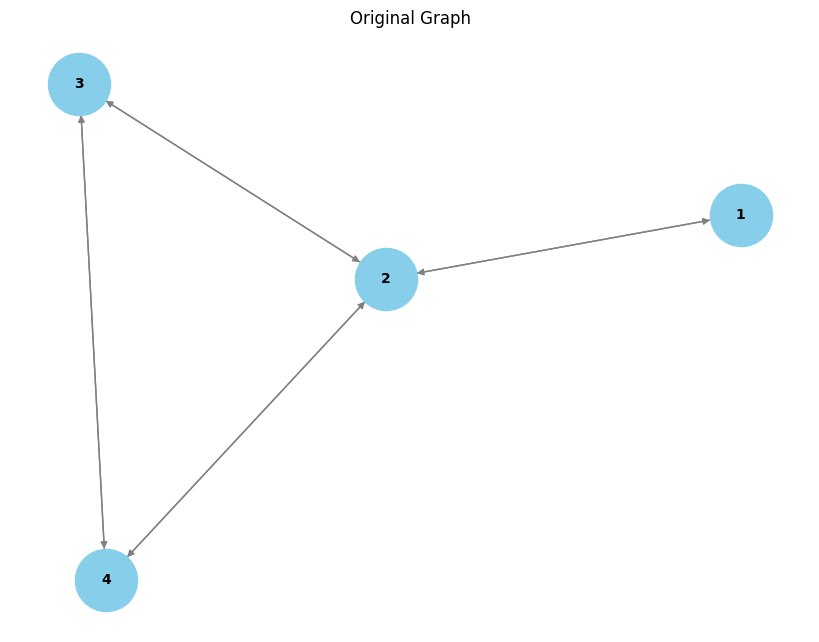

In [38]:
#problem2
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a undirected graph
G = nx.DiGraph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

#Add edges
edges = [(1, 2), (2, 1), (2, 3), (2, 4), (4,3), (3,4), (3,2) , (4,2)]
G.add_edges_from(edges)

# Draw original graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_weight='bold', edge_color='gray')
plt.title("Original Graph")

# Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G)
adj_array = adj_matrix.toarray()
#print(adj_array)

# Compute the degree matrix
degree_matrix = np.diag(np.sum(adj_array, axis=1))

# Compute the Laplacian matrix
laplacian_matrix = degree_matrix - adj_array


# Compute the eigenvalues
eigenvalues = np.linalg.eigvals(laplacian_matrix)

print("Eigenvalues of the Laplacian Matrix:")
print(eigenvalues)
#print("laplacian Matrix:")
#print(laplacian_matrix)

Consensus values for each node:
Node 0: -3
Node 1: -4
Node 2: -18
Node 3: 8
Node 4: 25


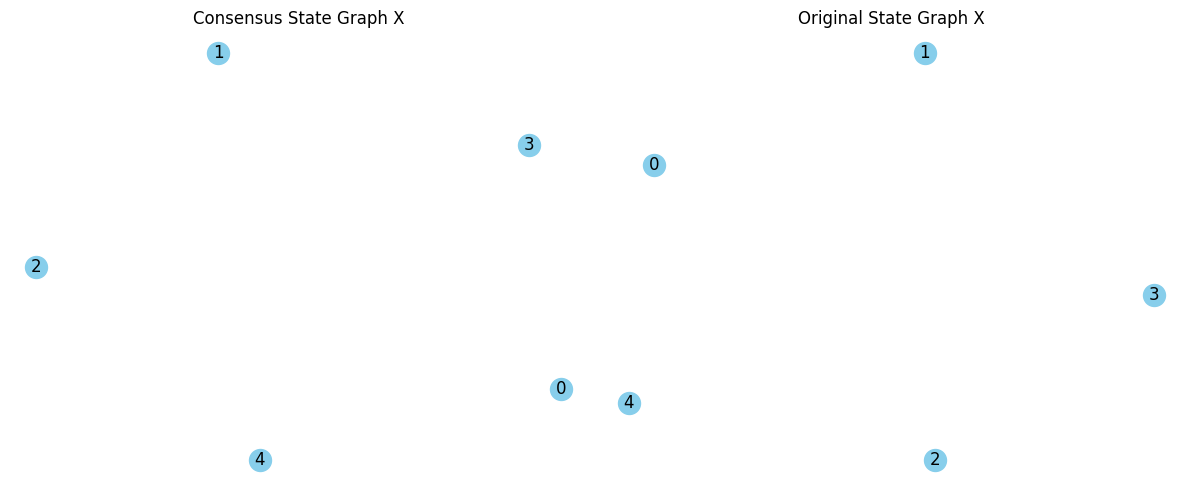

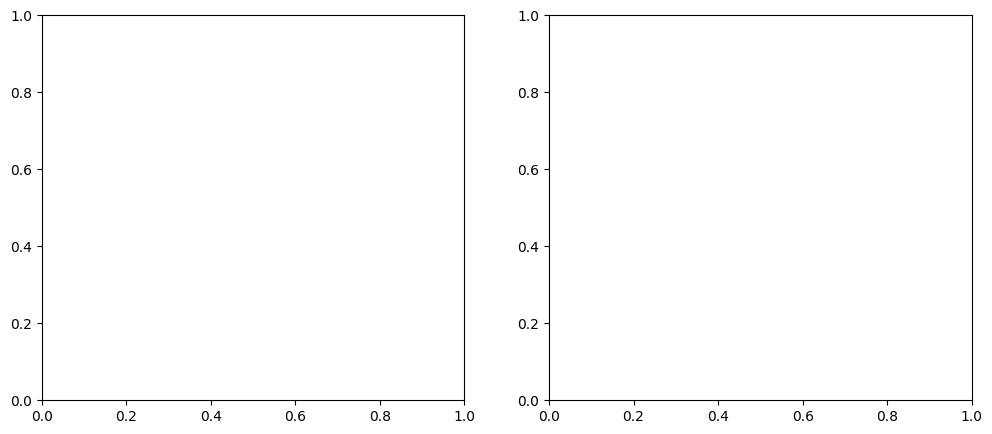

In [140]:
#problem3

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#function to generate desired graph
def AgentGen(state):
    
    X = nx.DiGraph()
    x_pos = [3, 2, 6, -2, -5]
     
    for i in range(5):
        X.add_node(i, pos=(x_pos[i], 0))
    return X
                   
    #add edges based on the problem
    if state == "a":
        edges = [(1, 2), (2, 1), (2, 3), (3, 2), (3,4), (4,3), (4,5) , (4,1), (1,4) ,(5,4)]
        
    elif state == "b":
        edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5,4), (4,1)]
        X.add_edges_from(edges)
            
    elif state == "c":
        edges = [(1, 2), (2, 3), (3, 1), (4, 3), (1,4), (4,1), (4,5) , (5,4)]
        X.add_edges_from(edges)
 
    elif state == "d":
        edges = [(1, 2), (2, 1), (2, 3), (3, 2), (3,4), (4,3), (4,5) , (4,1), (1,4)]
        X.add_edges_from(edges)
        
    X.add_edges_from(edges)
    return X

#function to generate desired graph
def DesiredGen():
    
    X = nx.DiGraph()
    x_pos = [1,2,3,4,5]
    for i in range(4):
        X.add_node(i, pos=(x_pos[i], 0))
    return X
    
def plot_graph(graph, ax, title):
     # Get node positions
    graph_pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos = graph_pos, with_labels=True, node_size=250, node_color='skyblue', ax=ax)
    ax.set_title(title)
    
def Consensus(X, A_i, iter_num):
    if len(A_i) != X.number_of_nodes():
        raise ValueError("Length of A_i list must be equal to the number of nodes in the graph")

    for _ in range(iter_num):
        for node in X.nodes():  # Iterate over each node in the graph
            neighbors_sum = 0
            for neighbor in X.neighbors(node):  # Iterate over neighbors of the current node
                neighbors_sum += sum(X.nodes[neighbor]['pos'])

            # Calculate the weighted sum of the current node's state and its neighbors' states
            weighted_sum = -A_i[node] * sum(X.nodes[node]['pos']) + (1 - A_i[node]) * neighbors_sum
            
            # Update the current node's state
            X.nodes[node]['pos'] = (weighted_sum,)  # Assuming position is a single value, otherwise adjust accordingly
    
    return X

Desired = DesiredGen()

# Let's create E_i and E_j based on the positions of nodes in graph Y
A_i = [1,2,3,4,5]
        
A = AgentGen("a")
B = AgentGen("b")
C = AgentGen("c")
D = AgentGen("d")

Consensus = Consensus(B, A_i, 1)

# Print the consensus value for each node
print("Consensus values for each node:")
for node in Consensus.nodes():
    print(f"Node {node}: {Consensus.nodes[node]['pos'][0]}")
    
def plot_graph(ax, G, title):
    nx.draw(G, ax=ax, with_labels=True, node_size=250, node_color='skyblue')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust subplot layout to 1 row and 2 columns

# Plot the consensus state
plot_graph(axes[0], Consensus, 'Consensus State Graph X')

# Plot the original state
plot_graph(axes[1], D, 'Original State Graph X')

plt.tight_layout()
plt.show()

agents = [A, B, C, D]
Consensus_agents = []


fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Adjust subplot layout to 1 row and 2 columns


In [165]:
#problem 4

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define the Laplacian matrix L
L = np.array([
    [1, 0, -1, 0, 0],
    [-1, 1, 0, 0, 0],
    [0, -1, 2, -1, 0],
    [-1, 0, 0, 2, -1],
    [0, 0, 0, -1, 1]
])

# Function to estimate the left eigenvector corresponding to eigenvalue 0 using power iteration method
def estimate_left_eigenvector(L, max_iter=1000, tol=1e-6):
    n = L.shape[0]
    x = np.random.rand(n)  # Initial guess for the left eigenvector
    x /= np.linalg.norm(x)  # Normalize the initial guess

    for _ in range(max_iter):
        prev_x = x
        x = L.T @ x  # Multiply by the transpose of L to estimate the left eigenvector
        x /= np.linalg.norm(x)  # Normalize the result

        # Check for convergence
        if np.linalg.norm(x - prev_x) < tol:
            break

    return x

# Estimate the left eigenvector
left_eigenvector = estimate_left_eigenvector(L, 10000, 1e-6)



# Compute the eigenvalues
eigenvalues = np.linalg.eigvals(laplacian_matrix)

# Compute the eigenvalues and eigenvectors
eigenvalues, left_eigenvectors = np.linalg.eig(laplacian_matrix.T)

# Find the index of the eigenvalue 0
zero_eigenvalue_index = np.where(np.abs(eigenvalues) < 1e-10)[0][0]

# Extract the left eigenvector corresponding to eigenvalue 0
left_eigenvector_0 = left_eigenvectors[:, zero_eigenvalue_index]

print("Left eigenvector corresponding to eigenvalue 0:")
print(left_eigenvector_0 , "\n")
print("Left eigenvector corresponding to eigenvalue 0 Estimation :")
print(left_eigenvector)

Left eigenvector corresponding to eigenvalue 0:
[0.35355339+0.j 0.35355339+0.j 0.70710678+0.j 0.35355339+0.j
 0.35355339+0.j] 

Left eigenvector corresponding to eigenvalue 0 Estimation :
[ 0.10538375  0.49653578 -0.79961481 -0.10538375  0.30307904]
